# Machine Learning with K-Nearest Neighbors
 **K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

    

## Objectives

* In this micro-project, we'll use the KNN algorithm to classify instances from a dataset into target `custcat`.


<h1>Table of contents</h1>

 * About the dataset
 * Data Visualization and Analysis
 * Classification



Let's load required libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>


Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


In [2]:
path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv"

In [3]:
import requests
response = requests.get(url= path)
open('teleCust.csv','wb').write(response.content)

36047

### Load Data From CSV File  


In [4]:
df = pd.read_csv('teleCust.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>


#### Let’s see how many of each class is in our data set 


In [5]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers


You can easily explore your data using visualization techniques:


array([[<AxesSubplot: title={'center': 'income'}>]], dtype=object)

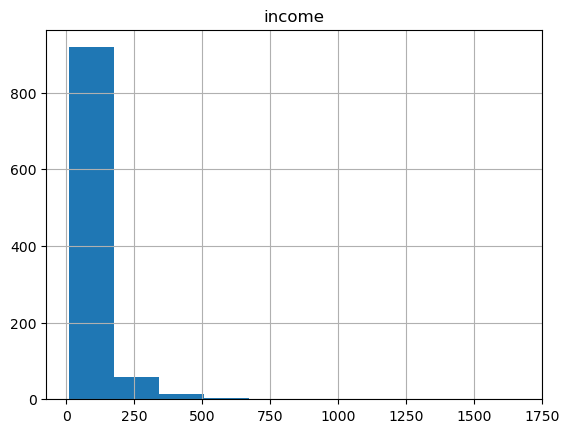

In [6]:
df.hist(column='income')

## Standardizing the Variables

Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:


In [7]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [8]:
scaler = StandardScaler()

Of course, we dont need to scale the target `custcat`, so we will ignore that during scaler fitting.

In [9]:
features = df.drop('custcat',axis=1)
features.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [10]:
scaler.fit(features)

StandardScaler()

Now we'll use the .transform() method to transform the features to a scaled version.

In [11]:
scaled_feats = scaler.transform(features)

In [12]:
#Converting the scaled features to a dataframe
scaled_df = pd.DataFrame(scaled_feats)
#scaled a dataframe it removes columns name
scaled_df.columns = features.columns
scaled_df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,-0.026968,-1.055125,0.184505,1.010051,-0.253034,-0.126506,1.087753,-0.594123,-0.222076,-1.034598,-0.230650
1,1.198836,-1.148806,-0.691812,1.010051,-0.451415,0.546450,1.906227,-0.594123,-0.222076,-1.034598,2.556662
2,1.198836,1.521092,0.821826,1.010051,1.234819,0.359517,-1.367671,1.787528,-0.222076,0.966559,-0.230650
3,-0.026968,-0.118319,-0.691812,-0.990050,0.044536,-0.416251,-0.549196,-1.090300,-0.222076,0.966559,-0.927478
4,-0.026968,-0.586722,-0.930808,1.010051,-0.253034,-0.444291,-1.367671,-0.891829,-0.222076,-1.034598,1.163006


## Model Building

### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
* Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. 



In [13]:
from sklearn.model_selection import train_test_split

X = scaled_df
y = df['custcat']
X_train, X_test, y_train, y_test = train_test_split( X, y,train_size =0.8, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


<div id="classification">
    <h2>Classification</h2>
</div>


<h3>K nearest neighbor (KNN)</h3>


In [14]:
from sklearn.neighbors import KNeighborsClassifier

### for k = 4:

#### Training:

In [15]:
k = 4
#classifier
neigh = KNeighborsClassifier(n_neighbors = k)
#fitting the model with training data
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

#### Predicting
We can use the model to make predictions on the test set:


In [16]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

#### Accuracy evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


In [17]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


### for k=6 :
#### Training

In [18]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors= k)
neigh6.fit(X_train,y_train)

predicted_train_data = neigh6.predict(X_train)
yhat6 = neigh6.predict(X_test)
print('Train set Accuracy : ', metrics.accuracy_score(y_train,predicted_train_data))
print('test set accuracy : ', metrics.accuracy_score(y_test,yhat6))

Train set Accuracy :  0.51625
test set accuracy :  0.31


#### Similarly using Confustion matrix and classification report

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(metrics.confusion_matrix(y_test,yhat6))
print(metrics.classification_report(y_test,yhat6))

[[24  6 15  6]
 [ 9 14  9 12]
 [21 15 15  3]
 [19 12 11  9]]
              precision    recall  f1-score   support

           1       0.33      0.47      0.39        51
           2       0.30      0.32      0.31        44
           3       0.30      0.28      0.29        54
           4       0.30      0.18      0.22        51

    accuracy                           0.31       200
   macro avg       0.31      0.31      0.30       200
weighted avg       0.31      0.31      0.30       200



# Choosing a K value
K in KNN, is the number of nearest neighbors to examine. 
It is supposed to be specified by the user.

So, how can we choose right value for K?
 * choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.


## Plot the model accuracy for a different number of neighbors.


## Two way:
 1. Accuracy vs no of neighbour(K)
 2. Error_rate vs K value

### 1.  Accuracy vs K_value

In [31]:
k = 10
# mean of accuracy
mean_acc = np.zeros((k-1))
std_acc = np.zeros((k-1))
    
for n in range(1,k):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

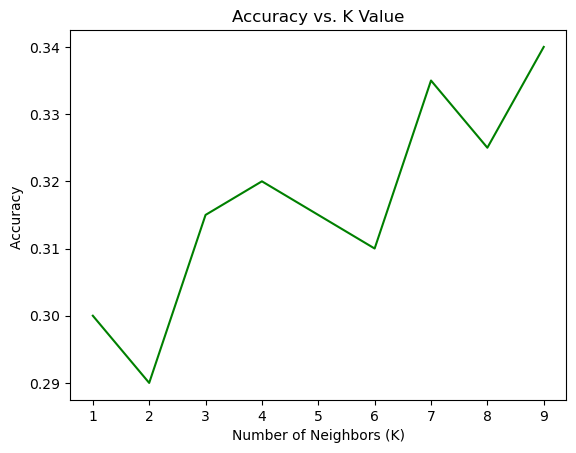

In [32]:
plt.plot(range(1,k),mean_acc,'g')

# plt.fill_between(range(1,k),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
# plt.fill_between(range(1,k),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
# plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.title('Accuracy vs. K Value')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
# plt.tight_layout()
plt.show()

In [33]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


In [35]:
mean_acc.argmax()

8

### ------------------------------------------------------OR-------------------------------------------------------------

### 2. Error_rate vs K_value

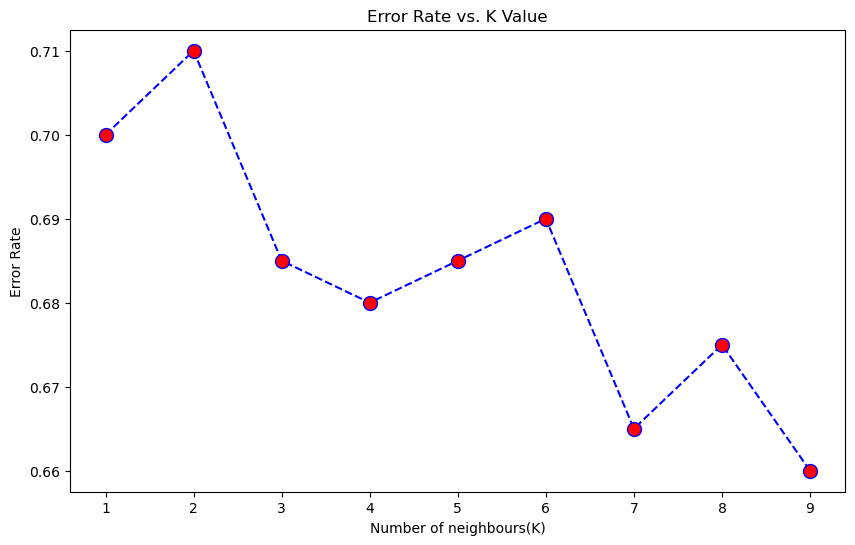

In [24]:
error_rate =[]

#erroe rate for different value of k 
for i in range(1,10):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    error_rate.append(np.mean(yhat != y_test))
    
    
#plot erroe rate vs Value
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('Number of neighbours(K)')
plt.ylabel('Error Rate')
plt.show()

In [30]:
print("Minimum error rate ",min(error_rate))

Minimum error rate  0.66


Now we can see the minimum error rate at k = 9, 

##### Retrain with new k value

In [28]:
neigh9 = KNeighborsClassifier(n_neighbors=9)
neigh9.fit(X_train,y_train)
yhat9 = neigh9.predict(X_test)

In [29]:
print(metrics.confusion_matrix(y_test,yhat9))
print(metrics.classification_report(y_test,yhat9))

[[26  7 13  5]
 [ 6 15 11 12]
 [21 10 18  5]
 [18 12 12  9]]
              precision    recall  f1-score   support

           1       0.37      0.51      0.43        51
           2       0.34      0.34      0.34        44
           3       0.33      0.33      0.33        54
           4       0.29      0.18      0.22        51

    accuracy                           0.34       200
   macro avg       0.33      0.34      0.33       200
weighted avg       0.33      0.34      0.33       200

